In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,svm,metrics

In [18]:
digits=datasets.load_digits()

In [19]:
images_and_labels=list(zip(digits.images,digits.target))

In [20]:
new_class=[]
for i,(images,labels) in enumerate(images_and_labels):
    if labels==0:
         new_class.append(1);
    else:
         new_class.append(2);


In [21]:
images_and_new_class=list(zip(digits.images,new_class))

In [22]:
n_samples=len(digits.images)

In [23]:
data=digits.images.reshape((n_samples,64))

In [24]:
classifier=svm.SVC(gamma=0.001)
classifier.fit(data[:n_samples//2],new_class[:n_samples//2])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
expected=new_class[n_samples//2:]
predicted=classifier.predict(data[n_samples//2:])

In [26]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
              precision    recall  f1-score   support

           1       1.00      0.97      0.98        88
           2       1.00      1.00      1.00       811

   micro avg       1.00      1.00      1.00       899
   macro avg       1.00      0.98      0.99       899
weighted avg       1.00      1.00      1.00       899




In [27]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

Confusion matrix:
[[ 85   3]
 [  0 811]]


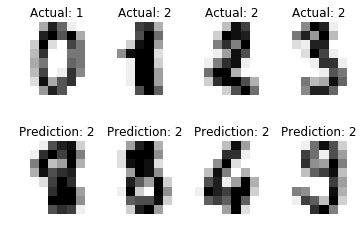

In [28]:
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, actual) in enumerate(images_and_new_class[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Actual: %i' % actual)
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

In [29]:
plt.show()